# Multiple Linear Regression

__Linear Regression Learning Objectives__ 
* Confidence Intervals
* Prediction Intervals
* MLR Assumptions
* MLR Transformations
* Diagnostic Plots

__Salmon Learning Objectives__ 
* Confidence Intervals
* Diagnostic Plots

In [55]:
import pandas as pd
from salmon import *
%matplotlib inline
plt.style.use('seaborn')
ames = pd.read_csv("data/chapter5/AmesHousing.txt", sep="\t")

## Confidence Intervals
Just like simple linear regression, we can calculate confidence intervals for multiple linear regression. These confidence intervals can give us a range of values that explain how the true mean of the response is affected for each single unit increase of a given explanatory value. For each coefficient, we can calculate the confidence interval with the following equation:

$$b_j \pm t^*SE_{b_j}$$

where $SE_{b_j} = \frac{s}{\sum(x_{ij} - \bar{x_j})^2}$ 

Let's calculate and interpret the confidence intervals for Ames housing model using SALMON. To do this, you can use the function `slope_confidence_intervals()`. This function defaults to 95% confidence intervals but you can change it by passing in the desired confidence interval into the `conf` parameter. _e.g._ `slope_confidence_intervals(conf=.8)` for an 80% confidence interval.

In [36]:
bedrooms = Q("Bedroom AbvGr")
living_area = Q("Gr Liv Area")
explanatory = bedrooms + living_area
response = Q("SalePrice")
model = LinearModel(explanatory, response)
model.fit(ames)
model.confidence_intervals()

,2.5%,97.5%
Gr Liv Area,131.955505,140.766301
Bedroom AbvGr,-31839.557753,-26458.661568
Intercept,52160.488943,66831.982628


For the living area, we are 95% confident that, for each additional square foot, the true mean house price increase between \$132 and \$141, adjusting for the number of bedrooms.

For the number of bedrooms, we are 95% confident that, for each additional bedroom, the true mean house price decreases between \$31840 and \$26459, adjusting for the living area.

## Prediction Intervals
Predicting is one of the main uses of Multiple Linear Regression. With prediction intervals, we can give a range of values that the true response value would be in, with a certain level of confidence. Given a new set of explanatory values, we can calculate a predicted value using our regression formula, with estimated parameter, then give a prediction interval for the true value with a confidence level. A prediction interval can be computed with the following equation:

$$b_j \pm t^*SE_{b_j}$$
or
$$b_j \pm t(1-\alpha / 2, n - p)SE_{b_j}$$



where $SE_{b_j} = \frac{s}{\sum(x_{ij} - \bar{x_j})^2}$

## Checking Assumptions with Diagonostic Plots
Once we fit a model, it is good practice to check some assumptions using residual plot. The following section will describe these assumptions.

##### Checking Normality
One important assumption of Linear Regression is that the residuals comes from a normal distribution of constant variance. To check this, we can create a Q-Q Plot with the residuals or create a histogram of the residuals. It is good to plot both because it may be hard to determine normality from just a histogram. In the histogram, we are looking for a classic normal bell shaped distribution. In this Q-Q plot, we are looking for the individual points to roughly follow the plotted straight line. If we find one ends of the points dips below our plotted line, our data is left skewed.  If one of the ends goes above the plotted line, our data is right skewed. If one end goes above the line and the other end goes below the line, we know that we have less data in the center of our distribution. Let's look at the residual plot for housing model. You can automically create a residual Q-Q plot with SALMON by calling `residual_quantile_plot()` and a histogram of the residuals by calling `residual_histogram()`.

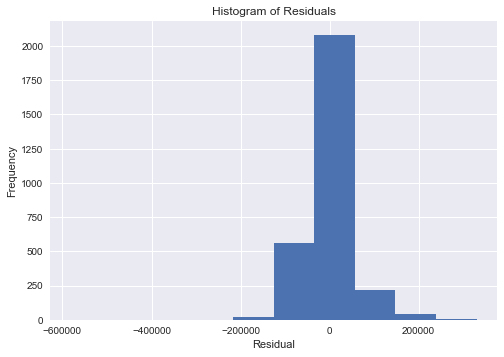

In [50]:
model.residual_histogram()

From this histogram, the distribution looks pretty normal but it is hard to tell. Let's create a Q-Q plot and take a closer look.

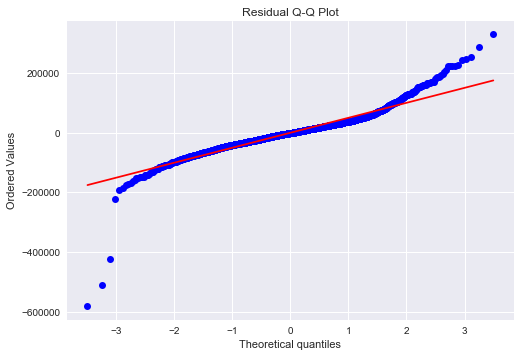

In [51]:
model.residual_quantile_plot()

From the Q-Q plot, we can see that our data is not normally distributed. This violates our assumption of normality but, we can fix this with transformations. As a reminder, here are some common transformations.

| Method      | Transformation       | 
| :-----------: |:-------------:|
| Logarithmic        | log(x) or log(y) | 
| Square          | $x^2$ or $y^2$ |
| Cube          |$x^3$ or $y^3$ |
| Square Root          | $\sqrt{x}$ or $\sqrt{y}$ |
| Cube Root          | $\sqrt[3]{x}$ or $\sqrt[3]{y}$ |
| Reciprocal        |  1/x or 1/y |

For this example, we see that there are a lot of large values. Let's apply a Log transformation to the response variable since it generally helps when dealing with larger values.

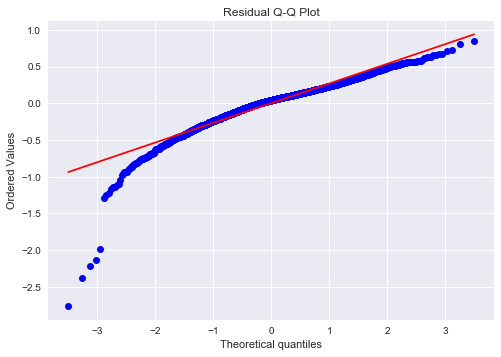

In [38]:
bedrooms = Q("Bedroom AbvGr")
living_area = Q("Gr Liv Area")
explanatory = bedrooms + living_area
response = Log(Q("SalePrice")) 
log_model = LinearModel(explanatory, response)
log_model.fit(ames)
log_model.residual_quantile_plot()

The Log transformation helped the upper end of the residual plot but our lower tail still dips below our normal line. This is probably because of the large number of outliers. Instead of a log transformation, let's try a square root transformation because it can squeeze our data toward the center of our distribution and greatly reduce outliers.

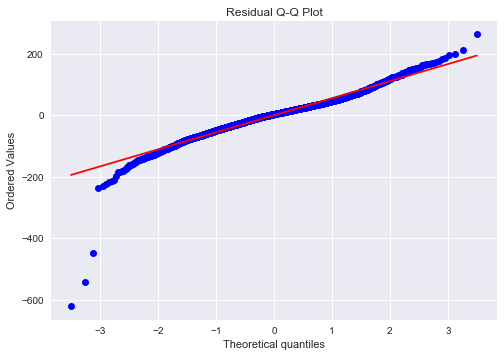

In [39]:
bedrooms = Q("Bedroom AbvGr")
living_area = Q("Gr Liv Area")
explanatory = bedrooms + living_area
response = Q("SalePrice") ** 0.5
sqrt_model = LinearModel(explanatory, response)
sqrt_model.fit(ames)
sqrt_model.residual_quantile_plot()

While this distribution is not perfectly straight, it is a huge improvement and we can still use this for our analysis.

##### Checking Independence
The next assumption we need to check if the residuals are independent. To do this, we need to plot the order of the residuals (this can be a time component or the order the data was received) versus the residual value. We would like to see a random distribution of points as our order increases. If we see notice any trends or shapes, it is likely that the errors are not independent and are effected by the order or time which the observation took place. We can plot a residual order plot in SALMON by calling `residual_order_plot()` on our model. Let's look at the residual order plot for our example that already has the square root transformation.


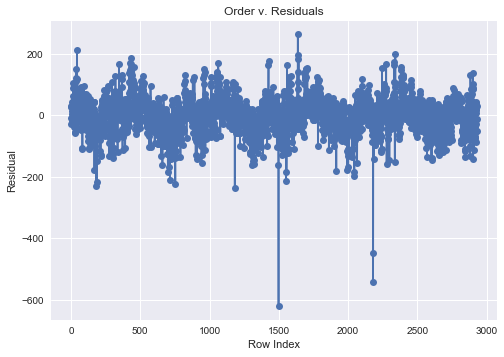

In [40]:
sqrt_model.residual_order_plot()

From the plot, we can see that the errors are without any trends based on order and independent.

##### Checking for Constant Variance
The third assumption we need to check for is that there is constant variance from the residuals. If we plot the fitted values versus the residuals, we expect to see a linear and constant shape. This plot is also helpful when trying to identify outliers. If we seeing that the variance increases or decreases as the fitted values increase or decrease, we call this __fanning__. To fix this, a transformation should be applied. Let's look at our Ames housing example without our log transformation. We can create the fitted value versus the residual plot in SALMON by calling `residual_fitted_plot()`.

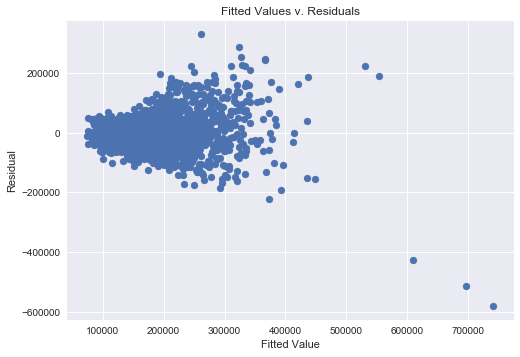

In [43]:
model.residual_fitted_plot()

Notice how the smaller fitted values have a smaller range of residuals and the larger fitted values have a wider range of residuals. This is a clear example of fanning and we need to apply a transformation to it. Let's see what our model with our square root transformation looks like.

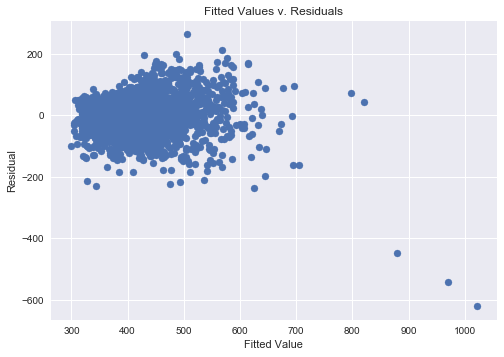

In [44]:
sqrt_model.residual_fitted_plot()

With our square root transformation, the fanning has almost completely gone away. While there may be a bit of fanning  left, we can make a note of this and the outliers and move on with our analysis.

##### Overview Diagnostic Plots
To quickly view all of our diagnostic plots in SALMON, call the method `residual_diagnostic_plots`. This helps get an overview look over all the diagnostic plots.

(<matplotlib.figure.Figure at 0x1a22bec278>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1a22bfb908>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1a22dfa4e0>))

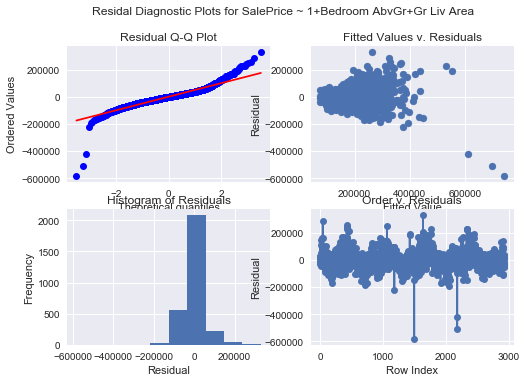

In [53]:
model.residual_diagnostic_plots()

(<matplotlib.figure.Figure at 0x1a22cef3c8>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1a22e3f358>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1a22eb2630>))

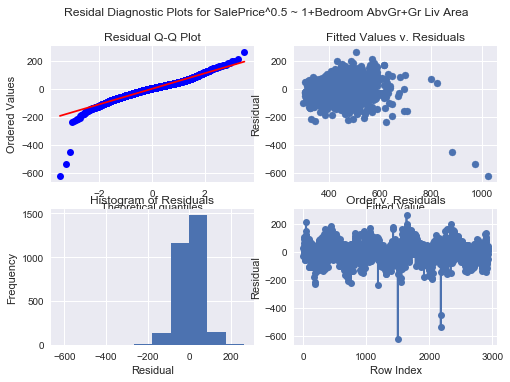

In [54]:
sqrt_model.residual_diagnostic_plots()